In [ ]:
# This calculates approximate dew points for the 100-level lab that will house GPI2

# Created 2021 May 6 by E.S.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# constants

a = 6.1121 # (mbar)
b = 18.678
c = 257.14 # (deg C)
d = 234.5 # (deg C)

In [17]:
def C_to_F(C_pass):
    
    F_pass = C_pass*9/5 + 32
    
    return F_pass

In [15]:
def F_to_C(F_pass):
    
    C_pass = (F_pass - 32) * 5/9 
    
    return C_pass

In [18]:
C_to_F(0)

32.0

In [5]:
def gamma_fcn(T_pass,RH_pass):
    '''
    'gamma' part of the Magnus formula
    '''
    
    gamma_T_RH = np.add(np.log(np.divide(RH_pass,100.)),np.divide(b*T_pass,c+T_pass))
    
    return gamma_T_RH

In [19]:
def magnus(T_F,RH_pass):
    '''
    Magnus formula, for finding dew point t_dp as fcn of T (C) and relative humidity RH (%)
    
    Input and output temperatures are in Fahrenheit
    '''
    
    T_pass = F_to_C(T_F)
    
    T_dp = np.divide(c*gamma_fcn(T_pass,RH_pass),b-gamma_fcn(T_pass,RH_pass))
    
    T_dp_F = C_to_F(T_dp)
    
    return T_dp_F

In [27]:
RH = np.arange(67,91,1)
dp_75F = magnus(T_F=75,RH_pass=RH)
dp_71F = magnus(T_F=71,RH_pass=RH)

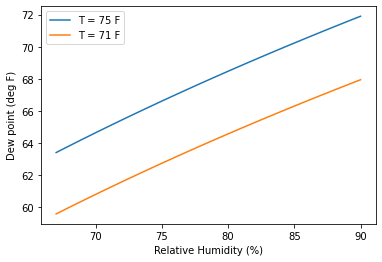

In [31]:
plt.plot(RH,dp_75F,label="T = 75 F")
plt.plot(RH,dp_71F,label="T = 71 F")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Dew point (deg F)")
plt.legend()
plt.savefig("dew_points.pdf")